**                        Credit Risk Model**






In this project we will be predicting the possibility that a borrower will not be able to make timely payments.
This would help banks to make decision with calculated risks before lending out loans.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
risk = pd.read_csv("/content/UCI_Credit_Card.csv")
risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
data = risk.copy()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Data Pre-processing

In [37]:
data.drop(["ID"], axis=1, inplace =True)

In [38]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [39]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**EDUCATION**

In [40]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

From the description we have 5,6 represents unknown. so, we can keep them in category 1.

In [41]:
data['EDUCATION'].replace ({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
data.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

**MARRIAGE COLUMN**

In [42]:
data["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [43]:
data['MARRIAGE'].replace({0:1,1:1,2:2,3:3},inplace=True)
data['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

**PAY_0 TO PAY_6**

In [44]:
data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [45]:
data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [46]:
data['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [47]:
data['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [48]:
data['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [49]:
data['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

**DATA VISUALIZATION**

Text(0.5, 1.0, 'Target Distribution')

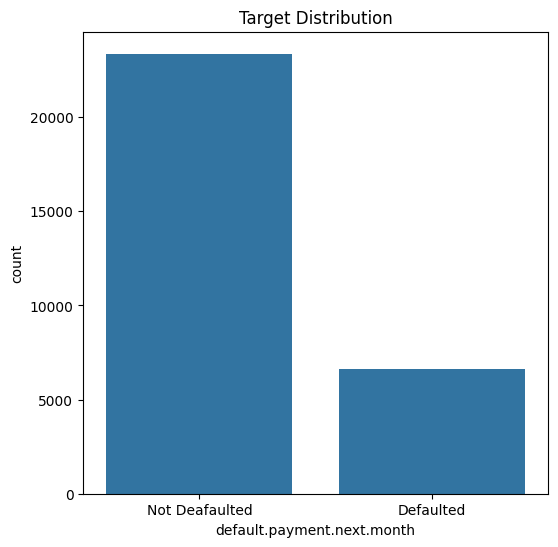

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x='default.payment.next.month', data=data)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

As we can see from the count plot the distribution is not balanced. We cannot train the model with baised data. Therefore, we will have to balance the data.

Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

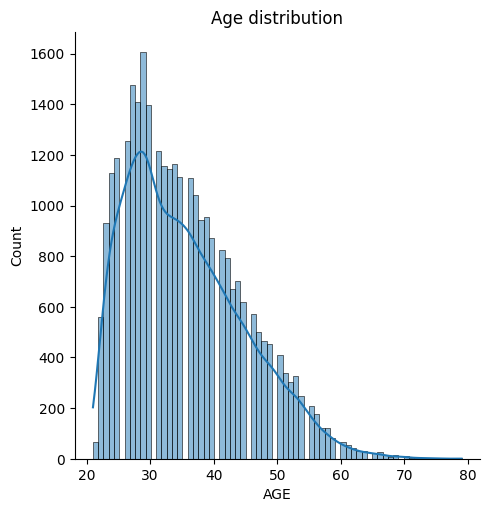

In [51]:
plt.figure(figsize=(6,6))
sns.displot(data['AGE'], kde=True)
plt.xticks(rotation=0)
plt.title("Age distribution")

Text(0.5, 1.0, 'Gender Distribution')

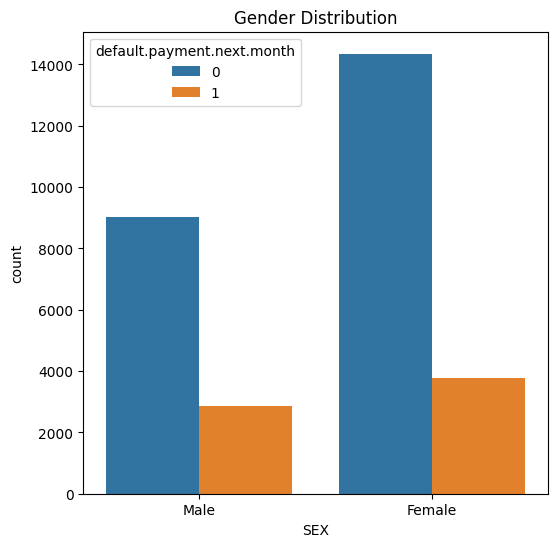

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(x='SEX',hue='default.payment.next.month',data=data)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Education Distribution')

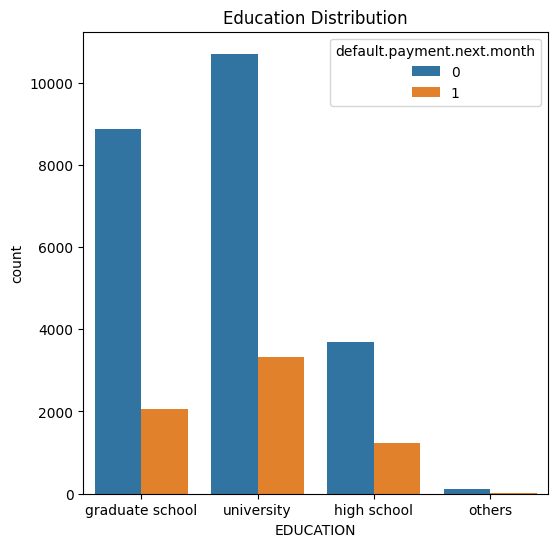

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(x='EDUCATION',hue ='default.payment.next.month',data=data)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")

Text(0.5, 1.0, 'Education Distribution')

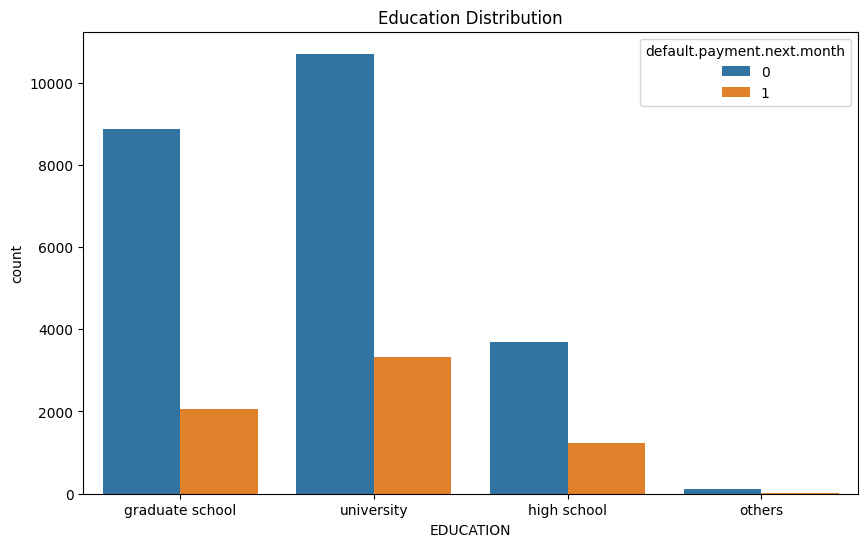

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x='EDUCATION', hue='default.payment.next.month',data=data)
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")

Text(0.5, 1.0, 'MARRIAGE Distribution')

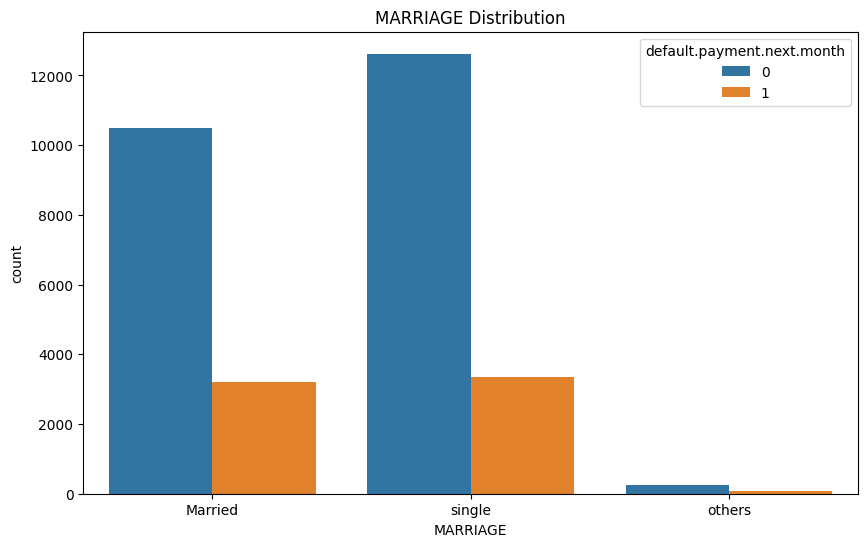

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='MARRIAGE',hue='default.payment.next.month',data=data)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

Text(0.5, 1.0, 'Limit Balance')

<Figure size 1000x600 with 0 Axes>

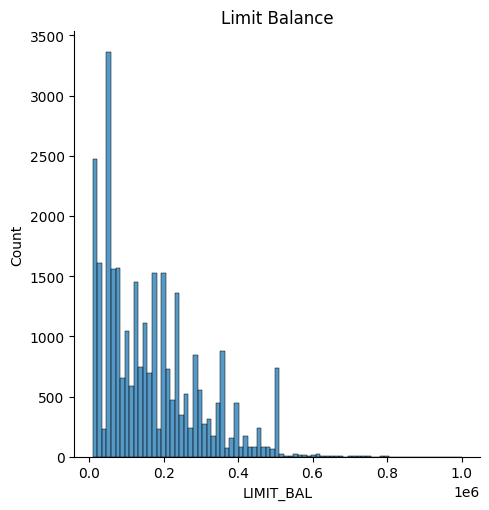

In [56]:
plt.figure(figsize=(10,6))
sns.displot(x='LIMIT_BAL',data=data)
plt.xticks(rotation=0)
plt.title("Limit Balance")

**FEATURE SELECTION**

In [57]:
a = data.drop(['default.payment.next.month'], axis=1)
b= data['default.payment.next.month']
a.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


**STANDARDIZATION**

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = scaler.fit_transform(a)

**TRAINING DATA**

In [59]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.2, random_state=42)

**SMOTE TECHNIQUE TO BALANCE THE TRAINING DATASET**

SMOTE(Synthetic Minority Oversampling Technique) is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Before oversampling', Counter(b_train))
SMOTE =SMOTE()

a_train, b_train = SMOTE.fit_resample(a_train,b_train)

print('After oversampling',Counter(b_train))

Before oversampling Counter({0: 18677, 1: 5323})
After oversampling Counter({0: 18677, 1: 18677})


As we can see now the data is balanced

**MODEL SELECTION**

RANDOM FOREST CLASSIFIER

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(a_train, b_train)

RandomForestClassifier()

In [62]:
RandomForestClassifier()
pred_RF=RF.predict(a_test)

In [63]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
print(accuracy_score(b_test,pred_RF))
print(classification_report(b_test, pred_RF))
conf_mat= confusion_matrix(b_test, pred_RF)
print(conf_mat)

0.7893333333333333
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4687
           1       0.52      0.45      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.78      6000

[[4140  547]
 [ 717  596]]


LOGISTIC REGRESSION MODEL

In [64]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(a_train, b_train)
# Predicting the model
pred_logit= logit.predict(a_test)

In [65]:
print(accuracy_score(b_test, pred_logit))
print(classification_report(b_test, pred_logit))
conf_mat= confusion_matrix(b_test, pred_logit)
print(conf_mat)

0.6865
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.65      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000

[[3261 1426]
 [ 455  858]]


SUPPORT VECTOR MACHINE

In [66]:
from sklearn.svm import SVC
vm= SVC()
vm.fit(a_train, b_train)

pred_svm= vm.predict(a_test)

In [67]:
print(accuracy_score(b_test, pred_svm))
print(classification_report(b_test, pred_svm))

0.7775
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4687
           1       0.49      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [68]:
conf_mat= confusion_matrix(b_test, pred_svm)
print(conf_mat)
print(accuracy_score(b_test, pred_svm))

[[3911  776]
 [ 559  754]]
0.7775


A comparitive study between all the 3 algorithms we can conclude that Random forest has the highest accuracy. Let's visualize the test result of Random forest.

In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RF,a,b,cv=10)
score.mean()

0.8156333333333332